# Can We Predict Who Will Default On A Loan?
## by Leslie Culliton

## Investigation Overview

This investigation was conducted to determine if any of the following variables in the loan data can be used to 
predict if someone may default on a loan:

LoanStatus
BorrowerRate
EmploymentStatus
CreditScoreRangeUpper
CreditScoreRangeLower
OpenRevolvingAccounts
OpenRevolvingMonthlyPayment
IncomeRange
LoanOriginalAmount
MonthlyLoanPayment
DelinquenciesLast7Years


## Dataset Overview

The data set from Prosper contains information about 113,937 loans and 81 variables that are tracked with the loans. A new data set was created using 10 variables from the original data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How Open Revolving Monthly Payments Affect Loan Status

The plots below indicate that the higher the monthly payments, the greater the likelihood that an account will 
default. The second plot shows that there is a high number of outliers in the upper range of the plot. 

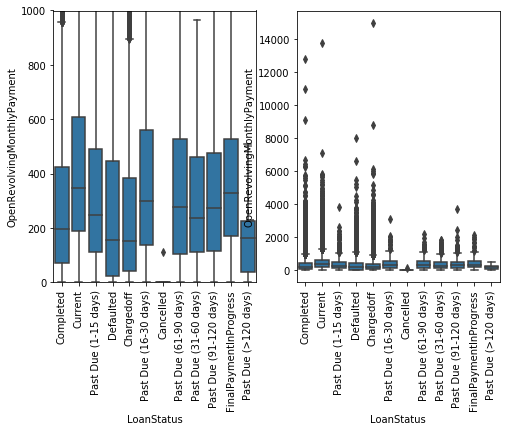

In [3]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'LoanStatus', y = 'OpenRevolvingMonthlyPayment', color = base_color)
plt.ylim(0, 1000)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'LoanStatus', y = 'OpenRevolvingMonthlyPayment', color = base_color)
plt.xticks(rotation = 90);

## How Past Delinquencies Affect Loan Status

The plots below show that previous deliquencies on accounts are an indicator that a loan may default.

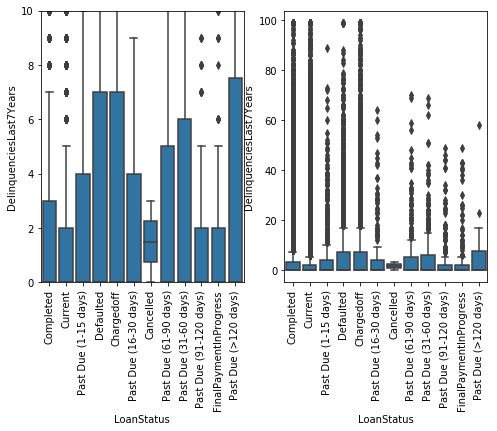

In [4]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'LoanStatus', y = 'DelinquenciesLast7Years', color = base_color)
plt.ylim(0, 10)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'LoanStatus', y = 'DelinquenciesLast7Years', color = base_color)
plt.xticks(rotation = 90);

## Past Delinquncies Paired With Monthly Payments Produce Surprising Results

Although both high number of delinquencies and high value of monthly payments have a negative affect on loan status in general, it appears that individuals with both a high number of past delinquecies are less likely to have high monthly payments. And, individuals with either high numbers of past delinquencies or high monthly payments are less likely to default.

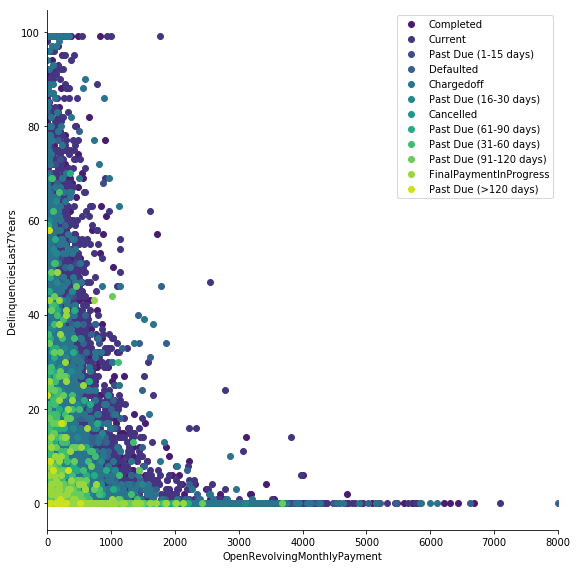

In [5]:
g = sb.FacetGrid(data = df, hue = 'LoanStatus', size = 8,
                 palette = 'viridis')
g.map(plt.scatter, 'OpenRevolvingMonthlyPayment', 'DelinquenciesLast7Years')
plt.xlim(0, 8000)
plt.legend()
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle